In [2]:
# 1. Import all Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from collections import Counter

In [3]:
# 2. Import Dataset
df = pd.read_csv('/content/employee_data.csv')  # Replace with your file path

# 3. Display head, tail, describe, nulls, and duplicates
print("Head:\n", df.head())
print("Tail:\n", df.tail())
print("Describe:\n", df.describe(include='all'))
print("Null Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())


Head:
    eid   salary  gender   age  car_purchased
0  101  50000.0    Male  28.0        15000.0
1  102  60000.0  Female  32.0        18000.0
2  103  55000.0    Male  29.0        16000.0
3  104  70000.0  Female  35.0        22000.0
4  105      NaN    Male  30.0        21000.0
Tail:
     eid   salary  gender   age  car_purchased
15  116  66000.0    Male   NaN        20000.0
16  117  71000.0  Female  37.0        24000.0
17  118  68000.0    Male  33.0        23000.0
18  119  69000.0  Female  34.0        22000.0
19  120  72000.0    Male  36.0        25000.0
Describe:
                eid        salary gender        age  car_purchased
count    20.000000     18.000000     19  19.000000      19.000000
unique         NaN           NaN      2        NaN            NaN
top            NaN           NaN   Male        NaN            NaN
freq           NaN           NaN     10        NaN            NaN
mean    110.000000  64611.111111    NaN  32.736842   20236.842105
std       6.282809   7852.604580 

In [10]:
# Drop nulls and duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# 4. Label Encode Categorical Strings
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Male=1, Female=0
bins = [0, 17000, 21000, 26000]
labels = ['Low', 'Medium', 'High']
df['purchase_category'] = pd.cut(df['car_purchased'], bins=bins, labels=labels)


TypeError: '<' not supported between instances of 'int' and 'str'

Target Counter:
 Counter({22000.0: 2, 25000.0: 2, 23000.0: 2, 15000.0: 1, 18000.0: 1, 16000.0: 1, 19000.0: 1, 20000.0: 1, 17500.0: 1, 18500.0: 1, 24000.0: 1})


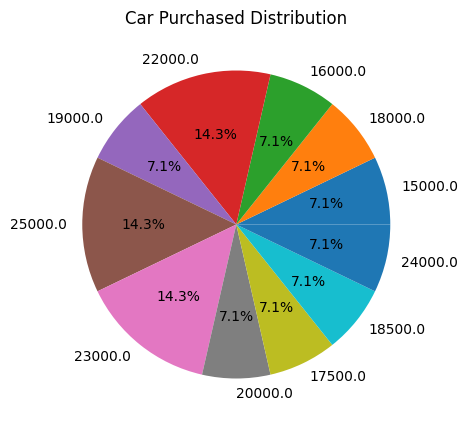

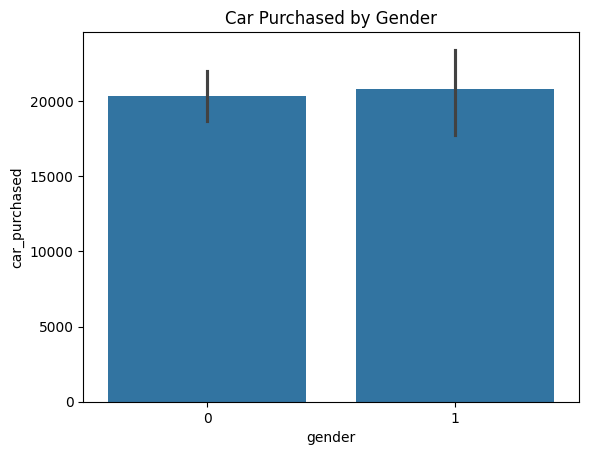

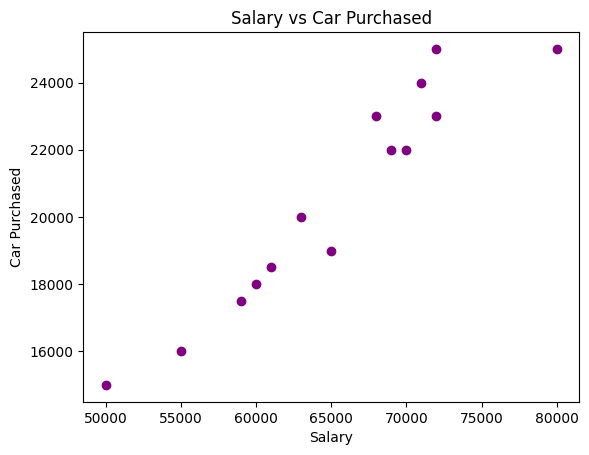


Outliers Detected (Formula):
 Empty DataFrame
Columns: [eid, salary, gender, age, car_purchased]
Index: []


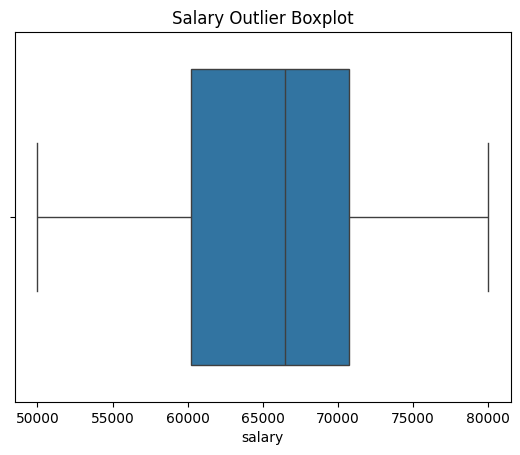

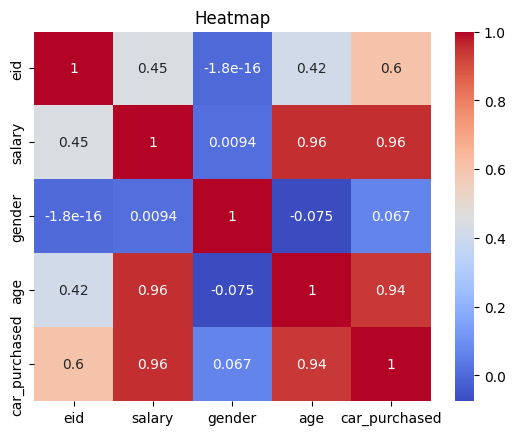

In [5]:
# 5. Counter on Target Column
target_counter = Counter(df['car_purchased'])
print("Target Counter:\n", target_counter)

# 6. Data Visualization
# Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(target_counter.values(), labels=target_counter.keys(), autopct='%1.1f%%')
plt.title("Car Purchased Distribution")
plt.show()

# Bar Plot
sns.barplot(x='gender', y='car_purchased', data=df)
plt.title("Car Purchased by Gender")
plt.show()

# Scatter Plot
plt.scatter(df['salary'], df['car_purchased'], color='purple')
plt.xlabel("Salary")
plt.ylabel("Car Purchased")
plt.title("Salary vs Car Purchased")
plt.show()

# 7. Outlier Detection (IQR Method and Boxplot)
Q1 = df['salary'].quantile(0.25)
Q3 = df['salary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['salary'] < lower_bound) | (df['salary'] > upper_bound)]
print("\nOutliers Detected (Formula):\n", outliers)

# Boxplot
sns.boxplot(x='salary', data=df)
plt.title("Salary Outlier Boxplot")
plt.show()

# 8. Heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap")
plt.show()


In [6]:
# 9. Data Processing (Split Features and Target)
df['car_purchased'] = df['car_purchased'].astype(str)  # Naive Bayes requires classification
X = df[['salary', 'gender', 'age']]
y = df['car_purchased']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# 10. Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [9]:
# 11. Accuracy & Metrics
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

     15000.0       0.00      0.00      0.00       1.0
     18500.0       0.00      0.00      0.00       1.0
     23000.0       0.00      0.00      0.00       1.0
     25000.0       0.00      0.00      0.00       0.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Outliers (Formula-Based):
Empty DataFrame
Columns: [eid, salary, gender, age, car_purchased]
Index: []


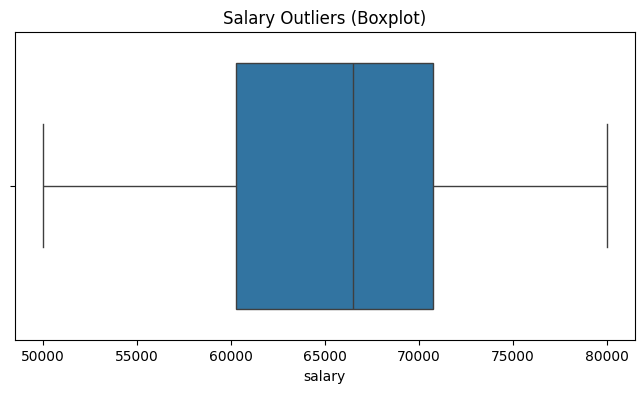

Accuracy: 0.6666666666666666
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       0.00      0.00      0.00         1
      Medium       0.50      1.00      0.67         1

    accuracy                           0.67         3
   macro avg       0.50      0.67      0.56         3
weighted avg       0.50      0.67      0.56         3



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


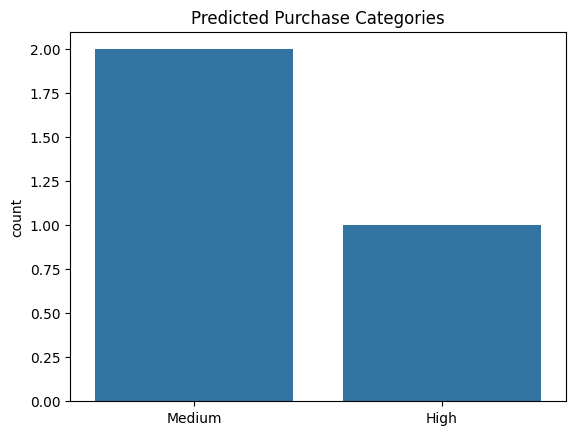

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load data
df = pd.read_csv("/content/employee_data.csv")

# Step 2: Clean data
df['car_purchased'] = pd.to_numeric(df['car_purchased'], errors='coerce')
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df.dropna(subset=['salary', 'car_purchased', 'age', 'gender'], inplace=True)
df.drop_duplicates(inplace=True)

# Step 3: Encode gender
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])  # Male=1, Female=0

# Step 4: Outlier Detection using IQR for salary
#Q1 = df['salary'].quantile(0.25)
#Q3 = df['salary'].quantile(0.75)
#IQR = Q3 - Q1
#outlier_condition = (df['salary'] < (Q1 - 1.5 * IQR)) | (df['salary'] > (Q3 + 1.5 * IQR))
#outliers = df[outlier_condition]
#print("Outliers (Formula-Based):")
#print(outliers)
from scipy import stats
z_scores = np.abs(stats.zscore(df['salary']))
outliers_z = df[z_scores > 2]  # use 2 or 3 depending on tolerance
print("Outliers (Z-score method):\n", outliers_z)


# Step 5: Outlier Visualization
plt.figure(figsize=(8,4))
sns.boxplot(x=df['salary'])
plt.title("Salary Outliers (Boxplot)")
plt.show()

# Step 6: Binning car_purchased into categories
bins = [0, 17000, 21000, 26000]
labels = ['Low', 'Medium', 'High']
df['purchase_category'] = pd.cut(df['car_purchased'], bins=bins, labels=labels)

# Step 7: Prepare X, y for Naive Bayes
X = df[['salary', 'gender', 'age']]
y = df['purchase_category']

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Train Naive Bayes Model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 10: Prediction and Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 11: Visualize Predictions
sns.countplot(x=y_pred)
plt.title("Predicted Purchase Categories")
plt.show()
